In [6]:
from cv2 import *
import numpy as np
from IPython.display import Image

In [7]:
path = r'data/sample_img.jpg'

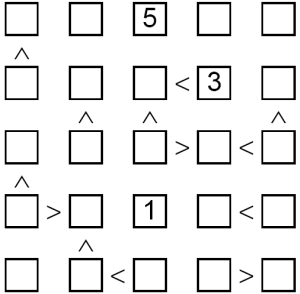

In [8]:
Image(path)

In [10]:
img = cv2.imread(path, 0)

(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)

# Invert the image
img_bin = 255-img_bin 
cv2.imwrite('data/image_bin.jpg',img_bin)

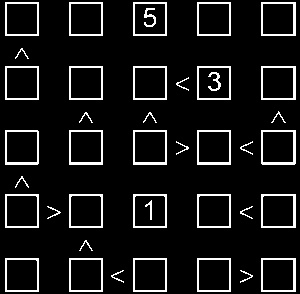

In [11]:
Image('data/image_bin.jpg')

In [12]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

In [93]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=2)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=1)
cv2.imwrite('data/verticle_lines.jpg',verticle_lines_img)

# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=2)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=1)
cv2.imwrite('data/horizontal_lines.jpg',horizontal_lines_img)

True

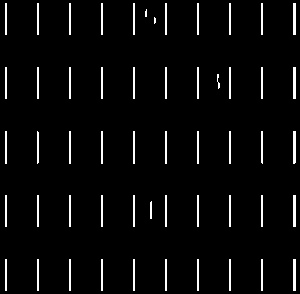

In [94]:
Image('data/verticle_lines.jpg')

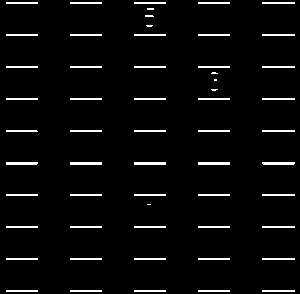

In [95]:
Image('data/horizontal_lines.jpg')

In [96]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha

# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
# img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=1)
(thresh, img_final_bin) = cv2.threshold(img_final_bin,255,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite('data/img_final_bin.jpg',img_final_bin)

True

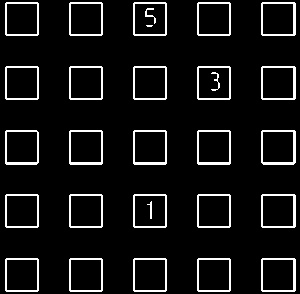

In [97]:
Image('data/img_final_bin.jpg')

In [98]:
def sort_contours(cnts, method='left-to-right'):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == 'right-to-left' or method == 'bottom-to-top':
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == 'top-to-bottom' or method == 'bottom-to-top':
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [102]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort all the contours by top to bottom.
# (contours, boundingBoxes) = sort_contours(contours, method='top-to-bottom')
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * img_final_bin.shape[1] )

In [168]:
### this is currently unecessary

# # process bounding boxes
# # if box is very close to another box, take the smaller one
# # do by center: x + w/2, y + h/2
# centres = []
# for c in contours:
#     # Returns the location and width,height for every contour
#     x, y, w, h = cv2.boundingRect(c)
#     centre = (x + w/2, y + h/2)
#     centres.append((centre, c))
# 
# new_contours = []
# for c in centres:
#     for c_comp in centres:
#         if c[0] == c_comp[0]:
#             continue
#             
#         x_diff = c[0][0] / c_comp[0][0]
#         y_diff = c[0][1] / c_comp[0][1]
#         
#         if x_diff < 5 and y_diff < 5:
#             x, y, w, h = cv2.boundingRect(c[1])
#             x_comp, y_comp, w_comp, h_comp = cv2.boundingRect(c_comp[1])
#             
#             c_size = w * h
#             c_comp_size = w_comp * h_comp
#             
#             if c_size > c_comp_size:
#                 new_contours.append(c_comp[1])
#                 centres.remove(c)
#             else:
#                 new_contours.append(c[1])
#                 centres.remove(c_comp)

In [166]:
cropped_dir_path = r'data/cropped/'
idx = 0
scale = 0.80
img = cv2.imread(path)

for c in contours:
    # Returns the location and width,height for every contour
    # x measured from left, y measured from top
    x, y, w, h = cv2.boundingRect(c)
    centre = (x + w/2, y + h/2)
    w, h = int(w * scale), int(h * scale)
    x, y = int(centre[0] - w//2), int(centre[1] - h/2)
    if (20 < w < 50 and 20 < h < 50):
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)

cv2.imwrite('data/img_with_boxes.png', img)

True

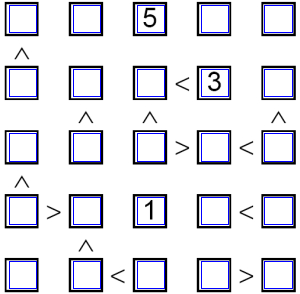

In [167]:
Image('data/img_with_boxes.png')

In [ ]:
get_puzzle('data/opencv_frame.jpg')